# CustomClassifier
This neural network uses reinforcement learning in addition to the **Resnet50** neural network, to produce a self-learning model.

Github : https://github.com/mohdmot/CustomClassifier <br><br>
![Drawing2.jpg](https://github.com/mohdmot/CustomClassifier/blob/main/Drawing2.jpg?raw=tru)

In [ ]:
# @title # **Reinforcement Unit**
# @markdown ---
# @markdown Getting the data from internet search engines:
# @markdown * Google
# @markdown * Bing
# @markdown * DuckDuckGo

# @markdown Save all data to a custom dataset in:
# @markdown * `/content/classifier`

# @markdown A folder for each Class


# get classes
# @markdown ---
# @markdown **Please Enter Your Classes Below With `,` For Spliting**

Classes = "Brachiosaurus, Trex" # @param {type:"string"}
Limit = 300 # @param
# @markdown Eg : `cat, dog, bird` and limit `1000000` for no limit

# @markdown ---

classes = []
for cc in Classes.split(','):
  if cc.strip() == '':
    continue
  classes.append( cc.strip() )


import os,time
from IPython.display import clear_output
# inatall somethings
if not('chromedriver' in os.listdir()) or not('google-chrome.deb' in os.listdir()) :
  print('Installing Requirements:')
  print('   Google Chrome ...',end="\r")
  os.system("wget https://www.slimjet.com/chrome/download-chrome.php?file=files%2F104.0.5112.102%2Fgoogle-chrome-stable_current_amd64.deb -O google-chrome.deb")
  os.system("dpkg -i google-chrome.deb")
  print('   Google Chrome ... OK')
  print('   Chrome Driver ...',end="\r")
  os.system("wget https://chromedriver.storage.googleapis.com/104.0.5112.79/chromedriver_linux64.zip")
  os.system("unzip chromedriver_linux64.zip")
  print('   Chrome Driver ... OK')
  print('   Selenium ...',end="\r")
  os.system("pip3 install selenium")
  print('   Selenium ... OK')
  time.sleep(1)
  clear_output()


import pathlib,urllib,requests,io,base64
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options


def google_images (driver,c,n):
  driver.get(f'https://www.google.com/search?tbm=isch&q={urllib.parse.quote(c)}')
  srcs = []
  for _ in range(30):
      driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
      time.sleep(2)  # Wait for the new images to load
      soup = BeautifulSoup(driver.page_source, 'html.parser')
      image_elements = soup.find_all("img", class_="rg_i")

      image_sources = [img.get("src") for img in image_elements]
      for i in image_sources:
        if (i != None) and not(i in srcs):
          if (len(srcs)+n) > Limit :
            break
          srcs.append(i)
      if (len(srcs)+n) > Limit :
            break
  return srcs

def bing_images (driver,c,n):
  driver.get(f'https://www.bing.com/images/search?q={urllib.parse.quote(c)}')
  srcs = []
  for _ in range(10):
      driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
      time.sleep(2)  # Wait for the new images to load
      soup = BeautifulSoup(driver.page_source, 'html.parser')
      image_elements = soup.find_all("img", class_="mimg")

      image_sources = [img.get("src") for img in image_elements]
      for i in image_sources:
        if (i != None) and not(i in srcs):
          if (len(srcs)+n) > Limit :
            break
          srcs.append(i)
      if (len(srcs)+n) > Limit :
        break
  return srcs

def duckduckgo_images (driver,c,n):
  driver.get(f'https://duckduckgo.com/?t=ffab&q={urllib.parse.quote(c)}&iax=images&ia=images')
  srcs = []
  for _ in range(10):
      driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
      time.sleep(2)  # Wait for the new images to load
      soup = BeautifulSoup(driver.page_source, 'html.parser')
      image_elements = soup.find_all("img", class_="tile--img__img")

      image_sources = [img.get("src") for img in image_elements]
      for i in image_sources:
        if (i != None) and not(i in srcs):
          if (len(srcs)+n) > Limit :
            break
          srcs.append('https:'+i)
      if (len(srcs)+n) > Limit :
        break
  return srcs


print(f'-> Classes available:\n{classes}')

# Make the dataset directory
try:
  os.mkdir('classifier')
except:None
dataset = pathlib.Path("classifier")
print(f'-> New dataset will be written to "{dataset}"')

# Set up the browser driver
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver_path = os.getcwd() + os.sep + 'chromedriver'
service = Service(driver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)

for c in classes:
  try:
    os.mkdir(f'classifier/{c}')
  except:None
  n=0
  print(f'-> Getting data for {c}:')
  google_d = google_images(driver,c,n)
  n += len(google_d)
  print(f'---> Fetching "{c}" data from Google ... {len(google_d)} image fetched')
  bing_d = bing_images(driver,c,n)
  n += len(bing_d)
  print(f'---> Fetching "{c}" data from Bing ... {len(bing_d)} image fetched')
  duckduckgo_d = duckduckgo_images(driver,c,n)
  n += len(duckduckgo_d)
  print(f'---> Fetching "{c}" data from DuckDuckGo ... {len(duckduckgo_d)} image fetched')
  #
  images = []
  images.extend(google_d)
  images.extend(bing_d)
  images.extend(duckduckgo_d)
  count = 0
  print(f'--> Writting data to "classifier/{c}" ...')
  for image in images:
    # a URL
    if image.startswith('http'):
      im = Image.open(requests.get(image, stream=True).raw)
    # a Base64 data
    elif image.startswith('data'):
      image = image.replace('data:image/jpeg;base64,','')
      im = Image.open(io.BytesIO(base64.decodebytes(bytes(image, "utf-8"))))
    try:
      im.save(f'classifier/{c}/{count}.jpeg')
    except:
      continue
    count+=1
  print(f'--> {count} image writted successfully')
  print(f'--> {len(images)-count} errors')


driver.quit()

-> Classes available:
['Brachiosaurus', 'Trex']
-> New dataset will be written to "classifier"
-> Getting data for Brachiosaurus:
---> Fetching "Brachiosaurus" data from Google ... 174 image fetched
---> Fetching "Brachiosaurus" data from Bing ... 127 image fetched
---> Fetching "Brachiosaurus" data from DuckDuckGo ... 0 image fetched
--> Writting data to "classifier/Brachiosaurus" ...
--> 294 image writted successfully
--> 7 errors
-> Getting data for Trex:
---> Fetching "Trex" data from Google ... 175 image fetched
---> Fetching "Trex" data from Bing ... 126 image fetched
---> Fetching "Trex" data from DuckDuckGo ... 0 image fetched
--> Writting data to "classifier/Trex" ...
--> 297 image writted successfully
--> 4 errors


classifier/Trex/1.jpeg


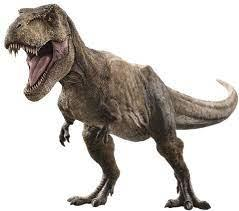

In [ ]:
from IPython.display import Image
import time,random
# @title # **Show Dataset**
Class = "Trex" # @param {type:"string"}
Speed = 0.5 # @param
if not(Class in os.listdir('classifier')):
  print(f'"{Class}" is not found')
else:
  dir = os.listdir(f'classifier/{Class}')
  random.shuffle(dir)
  for i in dir:
    try:
      pil_img = Image(filename=f'classifier/{Class}/{i}')
      print(f'classifier/{Class}/{i}')
      display(pil_img)
      time.sleep(Speed)
      clear_output()
    except KeyboardInterrupt:
      break




In [ ]:
# @title # **Training Unit**
# @markdown   This will take a lot of time
# @markdown
# @markdown Make sure the internet not disconnected , because you will loss the whole runtime
from tensorflow.python.keras.layers import Dense, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
import pathlib

training_batch_size=32
height,width=180,180
dataset = pathlib.Path("classifier")

train_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height,width),
  batch_size=training_batch_size
)


validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=training_batch_size
)

image_cat = train_set.class_names
print(' [+] Classes found :\n'+str(image_cat))


dnn_model = Sequential()

imported_model= tf.keras.applications.ResNet50(
  include_top=False,
  input_shape=(180,180,3),
  pooling='avg',
  classes=len(image_cat),
  weights='imagenet'
)

for layer in imported_model.layers:
  layer.trainable=False

dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = dnn_model.fit(
  train_set,
  validation_data=validation_set,
  epochs=10
)



Found 591 files belonging to 2 classes.
Using 473 files for training.
Found 591 files belonging to 2 classes.
Using 118 files for validation.
 [+] Classes found :
['Brachiosaurus', 'Trex']


Epoch 1/10
15/15 [==============================] - 82s 5s/step - loss: 1.0403 - accuracy: 0.7294 - val_loss: 0.1958 - val_accuracy: 0.9322
Epoch 2/10
15/15 [==============================] - 74s 5s/step - loss: 0.1355 - accuracy: 0.9429 - val_loss: 0.2007 - val_accuracy: 0.9322
Epoch 3/10
15/15 [==============================] - 74s 5s/step - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.1770 - val_accuracy: 0.9322
Epoch 4/10
15/15 [==============================] - 78s 5s/step - loss: 0.0322 - accuracy: 0.9915 - val_loss: 0.2081 - val_accuracy: 0.9322
Epoch 5/10
15/15 [==============================] - 85s 6s/step - loss: 0.0165 - accuracy: 0.9979 - val_loss: 0.2223 - val_accuracy: 0.9322
Epoch 6/10
15/15 [==============================] - 81s 5s/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.2094 - val_accuracy: 0.9322
Epoch 7/10
15/15 [==============================] - 80s 5s/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9407
Epoch 8/10
15/15 [==

1/1 [==============================] - 0s 235ms/step
The predicted category is Brachiosaurus


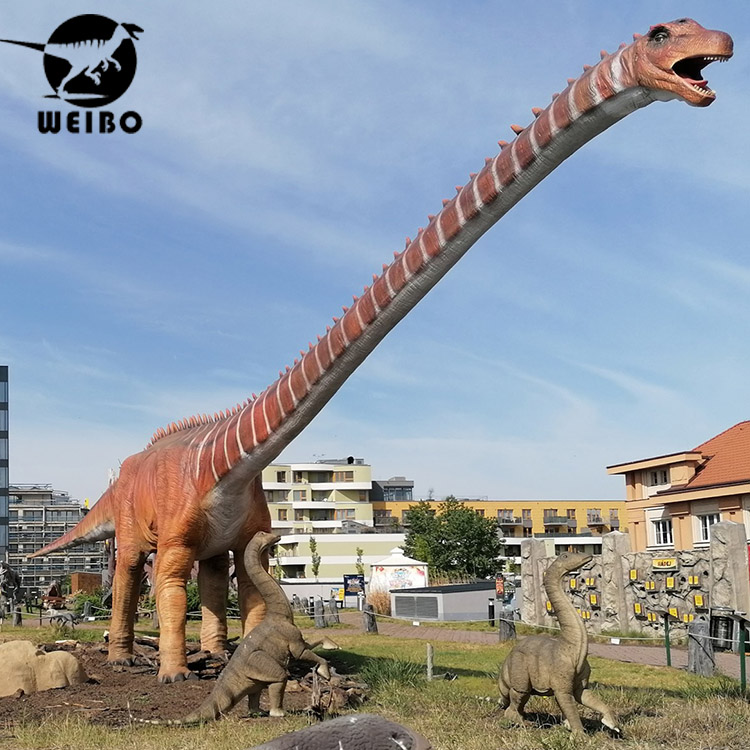

In [ ]:
# @title # **Testing Unit**
import cv2
import numpy as np
from PIL import Image
from IPython.display import Image as IImage
import urllib.request

Image_Link = "https://sc04.alicdn.com/kf/Hb48c2f13fab94ef19215dd72c39c5a7dM/205124887/Hb48c2f13fab94ef19215dd72c39c5a7dM.jpg" # @param {type:"string"}


img_f = str(random.randint(1000000,9999999))+'.jpeg'
'''
im = Image.open(requests.get(Image_Link, stream=True).raw)
im.save( img_f )
'''

urllib.request.urlretrieve(Image_Link,img_f)

image=cv2.imread( img_f )
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)

model_pred=dnn_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

im = IImage(filename=img_f)
display(im)

os.remove(img_f)

In [ ]:
# @title # **Clean Model**
# @markdown if you want to use it again, just run this cell
print('[+] Last Used Classes :\n'+str(classes))

for i in classes:
  print(f'[+] Removing {i}')
  dir = os.listdir(f'classifier/{i}')
  for f in dir:
    os.remove(f'classifier/{i}/{f}')
  print(f'[+] {len(dir)} images deleted')
  os.rmdir(f'classifier/{i}')